# Intro to Applied Statistics
## Project 2: Price Analysis of Used Cars
### Part 1: Exploratory Dat Analysis (EDA)

November 24, 2024

Dennis Cruz

EMPLID: 23737383

### Step 1: Reading and understanding the data:

In [3]:
## Installing required packages:

# !pip install opendatasets
import pandas as pd
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Maximazing Pandas to be able to see all of the columns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
## Downloading the dataset from Kaggle:

od.download("https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset?resource=download")

Skipping, found downloaded files in ".\us-used-cars-dataset" (use force=True to force download)


In [4]:
## Reading and importing the data to understand its numerical and categorical variables:

file = ('./us-used-cars-dataset/used_cars_data.csv')
cars_data = pd.read_csv(file)

C:\Users\denni\AppData\Local\Temp\ipykernel_21736\665705009.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  cars_data = pd.read_csv(file)


**Exploring data:**

In [5]:
cars_data.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,NaN,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,NaN,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [7]:
## Getting info of the database:

cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           object 
 21  front_le

### Step 2: Data Cleaning and Preparation

In [8]:
## Checking if there are repeated entries:

len(cars_data['vin'].unique())

3000000

In [9]:
# Removing duplicates based on 'vin' numbers:

cars_data.drop_duplicates(subset=['vin'], inplace = True)
print("Total rows and columns:", cars_data.shape)

Total rows and columns: (3000000, 66)


In [10]:
# Checking number of missing values:

print(cars_data.isnull().sum())

vin                              0
back_legroom                159266
bed                        2980432
bed_height                 2570909
bed_length                 2570909
body_type                    13542
cabin                      2936468
city                             0
city_fuel_economy           491278
combine_fuel_economy       3000000
daysonmarket                     0
dealer_zip                       0
description                  77900
engine_cylinders            100580
engine_displacement         172383
engine_type                 100580
exterior_color               49955
fleet                      1426579
frame_damaged              1426579
franchise_dealer                 0
franchise_make              572617
front_legroom               159266
fuel_tank_volume            159266
fuel_type                    82724
has_accidents              1426579
height                      159266
highway_fuel_economy        491278
horsepower                  172383
interior_color      

In [21]:
# Dropping NaNs from columns that can affect price:

cols_to_keep = ['fuel_type', 
                'has_accidents', 
                'horsepower', 
                'mileage', 
                'transmission', 
                'wheel_system', 
                'owner_count', 
                'body_type']

cars_data.dropna(axis=0, how='any', subset = cols_to_keep, inplace = True) # drops NaNs rows from the columns

In [22]:
print("Total rows and columns:", cars_data.shape)

Total rows and columns: (1378744, 57)


In [23]:
# Testing before dropping more columns:

print(cars_data.isnull().sum())

vin                          0
back_legroom              3361
body_type                    0
city                         0
city_fuel_economy       149876
daysonmarket                 0
dealer_zip                   0
description              20958
engine_cylinders            35
engine_displacement          0
engine_type                 35
exterior_color           27877
fleet                        0
frame_damaged                0
franchise_dealer             0
franchise_make          510558
front_legroom             3361
fuel_tank_volume          3361
fuel_type                    0
has_accidents                0
height                    3361
highway_fuel_economy    149876
horsepower                   0
interior_color          195843
isCab                        0
is_new                       0
latitude                     0
length                    3361
listed_date                  0
listing_color                0
listing_id                   0
longitude                    0
main_pic

In [25]:
# Dropping columns with NaNs that are not interesting for price analysis

most_nan = []
for col_dropped in cars_data:
    if (cars_data.isnull().sum()[col_dropped] > 1): # If columns have at least 1 NaN, drop them
        cars_data.drop(columns = col_dropped, inplace = True)

In [26]:
# Checking data again for NaNs:

print("Total rows and columns:", cars_data.shape)
print(cars_data.isnull().sum())

Total rows and columns: (1378744, 34)
vin                     0
body_type               0
city                    0
daysonmarket            0
dealer_zip              0
engine_displacement     0
fleet                   0
frame_damaged           0
franchise_dealer        0
fuel_type               0
has_accidents           0
horsepower              0
isCab                   0
is_new                  0
latitude                0
listed_date             0
listing_color           0
listing_id              0
longitude               0
make_name               0
mileage                 0
model_name              0
owner_count             0
price                   0
salvage                 0
savings_amount          0
sp_name                 0
theft_title             0
transmission            0
transmission_display    0
trimId                  0
wheel_system            0
wheel_system_display    0
year                    0
dtype: int64


In [29]:
# Looking at the cleaned dataset:

cars_data.head(10)

,vin,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,fuel_type,has_accidents,horsepower,isCab,is_new,latitude,listed_date,listing_color,listing_id,longitude,make_name,mileage,model_name,owner_count,price,salvage,savings_amount,sp_name,theft_title,transmission,transmission_display,trimId,wheel_system,wheel_system_display,year
10,ZARBAAC41FM129303,Coupe,Guaynabo,1252,969,1700.0,False,False,True,Gasoline,False,237.0,False,False,18.3467,2017-04-06,RED,171865107,-66.1098,Alfa Romeo,301.0,4C,2.0,97579.0,False,0,FIAT de San Juan,False,A,6-Speed Automatic,t56834,RWD,Rear-Wheel Drive,2015
12,WBA8B7C53GK368522,Sedan,Guaynabo,1233,969,3000.0,False,False,True,Gasoline,False,320.0,False,False,18.3467,2017-04-25,SILVER,173473505,-66.1098,BMW,6903.0,3 Series,2.0,58995.0,False,0,FIAT de San Juan,False,A,8-Speed Automatic,t58802,AWD,All-Wheel Drive,2016
36,KMHD84LFXHU271438,Sedan,Bay Shore,33,11706,1600.0,False,False,True,Gasoline,False,201.0,False,False,40.7333,2020-08-07,BLACK,278722292,-73.2587,Hyundai,30707.0,Elantra,1.0,13324.0,False,2709,Atlantic Chevrolet Cadillac,False,A,6-Speed Automatic,t72685,FWD,Front-Wheel Drive,2017
38,1G1ZD5ST5JF222895,Sedan,Bay Shore,55,11706,1500.0,True,False,True,Gasoline,False,160.0,True,False,40.7333,2020-07-16,SILVER,276675304,-73.2587,Chevrolet,42394.0,Malibu,1.0,14639.0,False,1749,Atlantic Chevrolet Cadillac,False,A,6-Speed Automatic,t74365,FWD,Front-Wheel Drive,2018
40,JTHSZ5BC5J5008777,Coupe,Bronx,36,10466,3500.0,False,False,True,Gasoline,False,311.0,False,False,40.8847,2020-08-04,BLACK,278352194,-73.8317,Lexus,62251.0,RC 350,1.0,32000.0,False,1861,Eastchester Chrysler Jeep Dodge Ram,False,A,6-Speed Automatic,t76289,AWD,All-Wheel Drive,2018
41,1GNERFKW0JJ104068,SUV / Crossover,Bay Shore,27,11706,3600.0,False,False,True,Gasoline,False,310.0,False,False,40.7333,2020-08-13,SILVER,279129180,-73.2587,Chevrolet,36410.0,Traverse,1.0,23723.0,False,3500,Atlantic Chevrolet Cadillac,False,A,9-Speed Automatic,t73662,FWD,Front-Wheel Drive,2018
45,1GNKVGKD7HJ340326,SUV / Crossover,Bay Shore,27,11706,3600.0,False,False,True,Gasoline,True,281.0,False,False,40.7333,2020-08-13,SILVER,279129181,-73.2587,Chevrolet,36055.0,Traverse,1.0,22422.0,False,2416,Atlantic Chevrolet Cadillac,False,A,6-Speed Automatic,t67372,AWD,All-Wheel Drive,2017
47,1C4RJFAG7JC203082,SUV / Crossover,Bay Shore,24,11706,3600.0,False,False,True,Gasoline,False,295.0,False,False,40.7333,2020-08-16,BLACK,279531621,-73.2587,Jeep,25745.0,Grand Cherokee,1.0,29424.0,False,2254,Atlantic Chevrolet Cadillac,False,A,8-Speed Automatic,t75215,4WD,Four-Wheel Drive,2018
49,1C4NJDEB7HD139874,SUV / Crossover,Bronx,20,10466,2400.0,False,False,True,Gasoline,False,172.0,False,False,40.8847,2020-08-20,BLACK,279775073,-73.8317,Jeep,14607.0,Compass,1.0,17000.0,False,1617,Eastchester Chrysler Jeep Dodge Ram,False,A,6-Speed Automatic,t68753,4WD,Four-Wheel Drive,2017
51,KMHTG6AF0LU021115,Coupe,Bronx,102,10466,2000.0,False,False,True,Gasoline,False,147.0,False,False,40.8847,2020-05-30,RED,272950938,-73.8317,Hyundai,3073.0,Veloster,1.0,16900.0,False,3866,Eastchester Chrysler Jeep Dodge Ram,False,A,6-Speed Automatic,t85906,FWD,Front-Wheel Drive,2020


In [30]:
# Saving the cleaned data:

cars_data.to_csv('new_cars_data.csv', index=False)

In [31]:
# Looking at the cleaned data

cleaned_data = pd.read_csv('new_cars_data.csv')
cleaned_data.head(25)

C:\Users\denni\AppData\Local\Temp\ipykernel_21736\3395164562.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv('new_cars_data.csv')


,vin,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,fuel_type,has_accidents,horsepower,isCab,is_new,latitude,listed_date,listing_color,listing_id,longitude,make_name,mileage,model_name,owner_count,price,salvage,savings_amount,sp_name,theft_title,transmission,transmission_display,trimId,wheel_system,wheel_system_display,year
0,ZARBAAC41FM129303,Coupe,Guaynabo,1252,969,1700.0,False,False,True,Gasoline,False,237.0,False,False,18.3467,2017-04-06,RED,171865107,-66.1098,Alfa Romeo,301.0,4C,2.0,97579.0,False,0,FIAT de San Juan,False,A,6-Speed Automatic,t56834,RWD,Rear-Wheel Drive,2015
1,WBA8B7C53GK368522,Sedan,Guaynabo,1233,969,3000.0,False,False,True,Gasoline,False,320.0,False,False,18.3467,2017-04-25,SILVER,173473505,-66.1098,BMW,6903.0,3 Series,2.0,58995.0,False,0,FIAT de San Juan,False,A,8-Speed Automatic,t58802,AWD,All-Wheel Drive,2016
2,KMHD84LFXHU271438,Sedan,Bay Shore,33,11706,1600.0,False,False,True,Gasoline,False,201.0,False,False,40.7333,2020-08-07,BLACK,278722292,-73.2587,Hyundai,30707.0,Elantra,1.0,13324.0,False,2709,Atlantic Chevrolet Cadillac,False,A,6-Speed Automatic,t72685,FWD,Front-Wheel Drive,2017
3,1G1ZD5ST5JF222895,Sedan,Bay Shore,55,11706,1500.0,True,False,True,Gasoline,False,160.0,True,False,40.7333,2020-07-16,SILVER,276675304,-73.2587,Chevrolet,42394.0,Malibu,1.0,14639.0,False,1749,Atlantic Chevrolet Cadillac,False,A,6-Speed Automatic,t74365,FWD,Front-Wheel Drive,2018
4,JTHSZ5BC5J5008777,Coupe,Bronx,36,10466,3500.0,False,False,True,Gasoline,False,311.0,False,False,40.8847,2020-08-04,BLACK,278352194,-73.8317,Lexus,62251.0,RC 350,1.0,32000.0,False,1861,Eastchester Chrysler Jeep Dodge Ram,False,A,6-Speed Automatic,t76289,AWD,All-Wheel Drive,2018
5,1GNERFKW0JJ104068,SUV / Crossover,Bay Shore,27,11706,3600.0,False,False,True,Gasoline,False,310.0,False,False,40.7333,2020-08-13,SILVER,279129180,-73.2587,Chevrolet,36410.0,Traverse,1.0,23723.0,False,3500,Atlantic Chevrolet Cadillac,False,A,9-Speed Automatic,t73662,FWD,Front-Wheel Drive,2018
6,1GNKVGKD7HJ340326,SUV / Crossover,Bay Shore,27,11706,3600.0,False,False,True,Gasoline,True,281.0,False,False,40.7333,2020-08-13,SILVER,279129181,-73.2587,Chevrolet,36055.0,Traverse,1.0,22422.0,False,2416,Atlantic Chevrolet Cadillac,False,A,6-Speed Automatic,t67372,AWD,All-Wheel Drive,2017
7,1C4RJFAG7JC203082,SUV / Crossover,Bay Shore,24,11706,3600.0,False,False,True,Gasoline,False,295.0,False,False,40.7333,2020-08-16,BLACK,279531621,-73.2587,Jeep,25745.0,Grand Cherokee,1.0,29424.0,False,2254,Atlantic Chevrolet Cadillac,False,A,8-Speed Automatic,t75215,4WD,Four-Wheel Drive,2018
8,1C4NJDEB7HD139874,SUV / Crossover,Bronx,20,10466,2400.0,False,False,True,Gasoline,False,172.0,False,False,40.8847,2020-08-20,BLACK,279775073,-73.8317,Jeep,14607.0,Compass,1.0,17000.0,False,1617,Eastchester Chrysler Jeep Dodge Ram,False,A,6-Speed Automatic,t68753,4WD,Four-Wheel Drive,2017
9,KMHTG6AF0LU021115,Coupe,Bronx,102,10466,2000.0,False,False,True,Gasoline,False,147.0,False,False,40.8847,2020-05-30,RED,272950938,-73.8317,Hyundai,3073.0,Veloster,1.0,16900.0,False,3866,Eastchester Chrysler Jeep Dodge Ram,False,A,6-Speed Automatic,t85906,FWD,Front-Wheel Drive,2020


After analyzing the cleaned data, with no NaNs there are still rows that are not meaningful for analyzing prices. We can drop these make it easier and faster to run the program.

In [34]:
# Dropping more unnecesary columns:

drop_cols = ['vin',
             'dealer_zip',
             'engine_displacement',
             'fleet',
             'frame_damaged',
             'franchise_dealer',
             'isCab',
             'latitude',
             'longitude',
             'listed_date', 
             'listing_id',
             'salvage', 
             'sp_name',
             'theft_title',
             'transmission_display',
             'trimId']
cleaned_data.drop(labels = drop_cols, axis = 1, inplace = True)

In [35]:
# Looking at the reduced data again:

cleaned_data.head()

,body_type,city,daysonmarket,fuel_type,has_accidents,horsepower,is_new,listing_color,make_name,mileage,model_name,owner_count,price,savings_amount,transmission,wheel_system,wheel_system_display,year
0,Coupe,Guaynabo,1252,Gasoline,False,237.0,False,RED,Alfa Romeo,301.0,4C,2.0,97579.0,0,A,RWD,Rear-Wheel Drive,2015
1,Sedan,Guaynabo,1233,Gasoline,False,320.0,False,SILVER,BMW,6903.0,3 Series,2.0,58995.0,0,A,AWD,All-Wheel Drive,2016
2,Sedan,Bay Shore,33,Gasoline,False,201.0,False,BLACK,Hyundai,30707.0,Elantra,1.0,13324.0,2709,A,FWD,Front-Wheel Drive,2017
3,Sedan,Bay Shore,55,Gasoline,False,160.0,False,SILVER,Chevrolet,42394.0,Malibu,1.0,14639.0,1749,A,FWD,Front-Wheel Drive,2018
4,Coupe,Bronx,36,Gasoline,False,311.0,False,BLACK,Lexus,62251.0,RC 350,1.0,32000.0,1861,A,AWD,All-Wheel Drive,2018


With a much reduced and cleaned data it is easier to look at the models and analyze prices:

In [63]:
# Sorting data by Make Names and price:

sorted_car_data = cleaned_data.sort_values(['make_name', 'price', 'mileage'])

In [56]:
# Exploring:
sorted_car_data.head(100)

,body_type,city,daysonmarket,fuel_type,has_accidents,horsepower,is_new,listing_color,make_name,mileage,model_name,owner_count,price,savings_amount,transmission,wheel_system,wheel_system_display,year
893334,SUV / Crossover,Angola,1449,Diesel,False,195.0,False,YELLOW,AM General,94000.0,Hummer,3.0,55000.0,0,A,AWD,All-Wheel Drive,1998
1243823,SUV / Crossover,Lakewood,104,Diesel,False,195.0,False,WHITE,AM General,97639.0,Hummer,8.0,59900.0,0,A,AWD,All-Wheel Drive,1999
543045,SUV / Crossover,Marietta,16,Diesel,False,195.0,False,YELLOW,AM General,53157.0,Hummer,4.0,63999.0,2773,A,AWD,All-Wheel Drive,2000
1306411,SUV / Crossover,Costa Mesa,75,Diesel,False,195.0,False,BLACK,AM General,64851.0,Hummer,3.0,65800.0,321,A,AWD,All-Wheel Drive,2000
1074278,SUV / Crossover,Flower Mound,2,Diesel,False,195.0,False,SILVER,AM General,49695.0,Hummer,9.0,71995.0,6056,A,AWD,All-Wheel Drive,2000
622314,SUV / Crossover,Daytona Beach,34,Diesel,False,195.0,False,RED,AM General,16928.0,Hummer,2.0,89950.0,0,A,AWD,All-Wheel Drive,1998
1073319,SUV / Crossover,Denton,79,Diesel,False,195.0,False,WHITE,AM General,108152.0,Hummer,6.0,99500.0,0,A,AWD,All-Wheel Drive,1999
704006,SUV / Crossover,Pompano Beach,27,Diesel,False,195.0,False,RED,AM General,47275.0,Hummer,3.0,99950.0,0,A,AWD,All-Wheel Drive,1999
975450,SUV / Crossover,Boise,30,Diesel,False,195.0,False,BLACK,AM General,35520.0,Hummer,2.0,124995.0,0,A,AWD,All-Wheel Drive,1998
683559,SUV / Crossover,Biloxi,135,Diesel,False,195.0,False,GRAY,AM General,4301.0,Hummer,6.0,139900.0,0,A,AWD,All-Wheel Drive,1999


### Step 3: Vizualizing the Data:

Vizualizing a relationship between price and mileage with scatter plots:

In [77]:
def scatter_plot(dataset, column_1, column_2, title):
    graph = dataset.plot(x = column_1, y = column_2, kind = "scatter", title = title)
    plt.title = title
    return graph

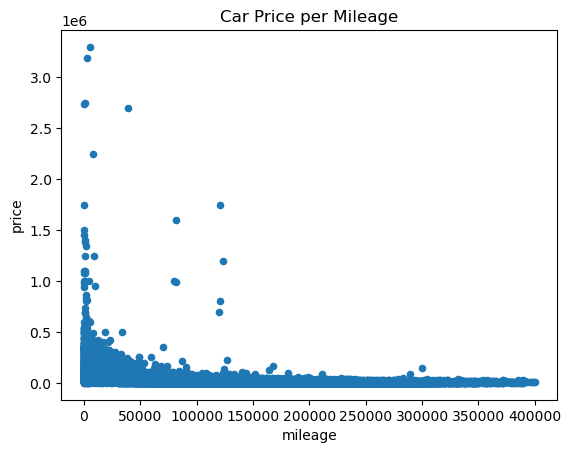

In [78]:
scatter_plot(sorted_car_data, 'mileage', 'price', 'Car Price per Mileage')
plt.show ()

Based on initial observations, there are a few outliers with a very high price and low mileage. This might be because of luxury cars that overthrow the distribution. Since there are over 1 million entries left and just a few cars over 500k, it's better to drop them.

In [79]:
# Removing outliers with over 100k price
for index, data in sorted_car_data.iterrows(): # iterates over the index in the DataFrame
    if data['price'] > 5e5:
        # print(sorted_car_data)
        sorted_car_data = sorted_car_data.drop(index)

In [229]:
# Checking how many cheaper cars are in the dataset:

count = 0
for index, data in sorted_car_data.iterrows(): # iterates over the index in the DataFrame
    if data['price'] < 1000:
        #print(sorted_car_data)
        count += 1
print(count)

306


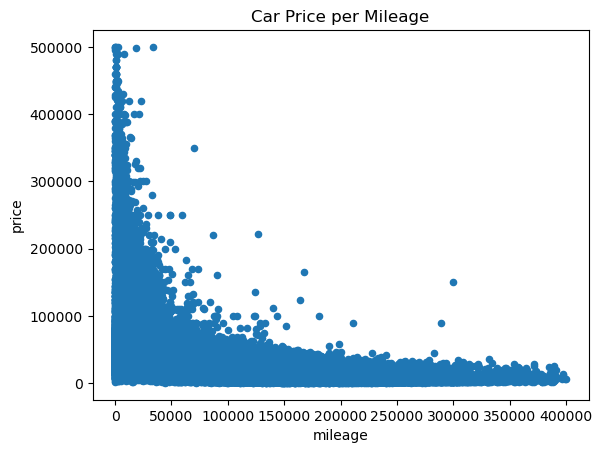

In [80]:
# Vizualizing again:

scatter_plot(sorted_car_data, 'mileage', 'price', 'Car Price per Mileage')
plt.show ()

So, based on the initial graph, there is a higher price for cars with a lower Mileage, and most of the price for cars range in under $100,000. Looking at other retalioships to determine prices:

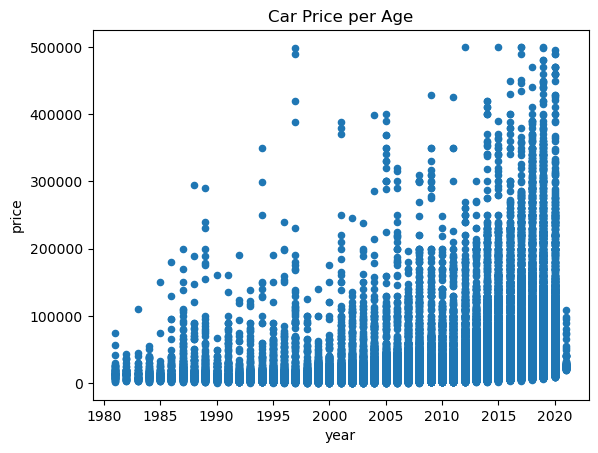

In [247]:
# Scatter plot of Price vs Age:

scatter_plot(sorted_car_data, 'year', 'price', 'Car Price per Age')
plt.show ()

Based on the plot it is noticeable that the newer the car, the more expensive it is, which makes sense as well except for cars in the 90s. This might be because of luxury cars or special edition that makes them more expensive.

Checking the distribution of data through boxplots:

In [94]:
# Displaying two related plots side by side

def box_plots (dataset, column_1, column_2, title_1, title_2):
    
    aroma_figure, aroma_axes = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)
    plt.tight_layout()
    #
    aroma_axes[0].boxplot(dataset[column_1])
    aroma_axes[0].set_title(title_1)
    aroma_axes[0].set_xlabel(column_1)
    aroma_axes[0].set_facecolor('lightgray')
    aroma_axes[0].grid(color='c')
    #
    aroma_axes[1].boxplot(dataset[column_2])
    aroma_axes[1].set_title(title_2)
    aroma_axes[1].set_xlabel(column_2)
    aroma_axes[1].set_facecolor('lightgray')
    aroma_axes[1].grid(color='plum')

    plt.show()

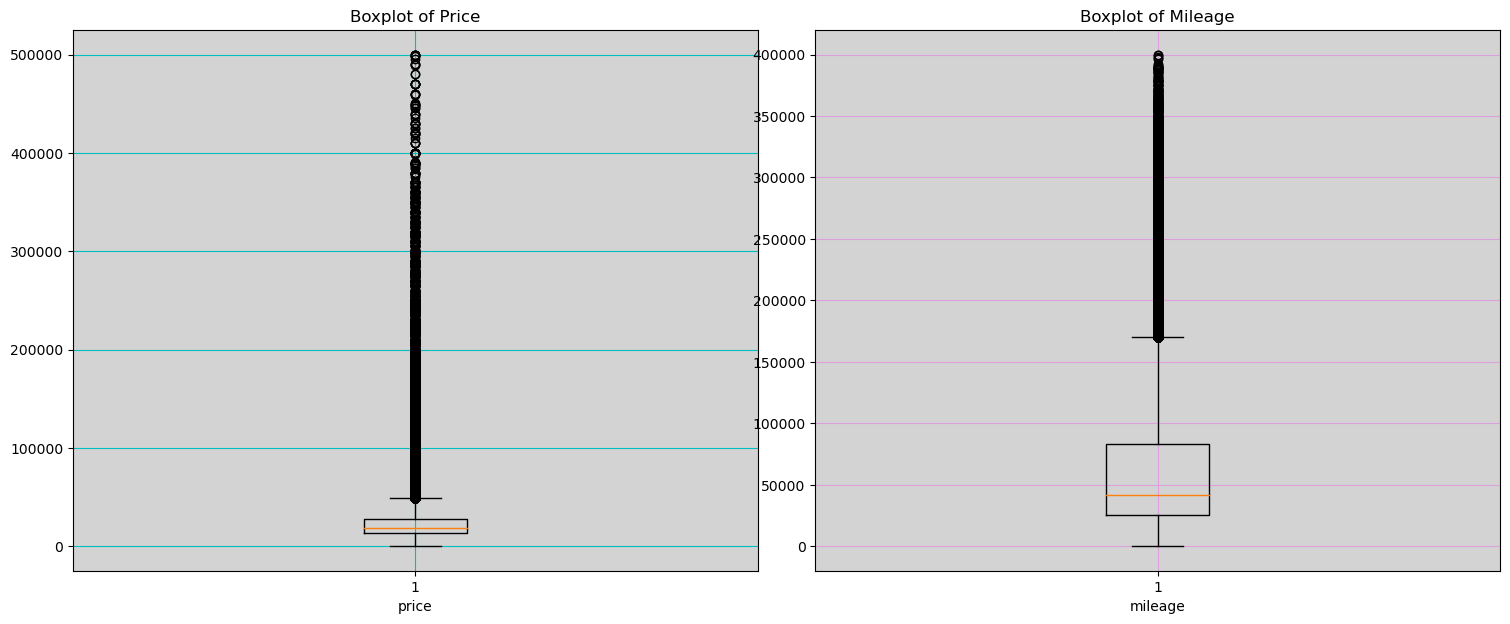

In [95]:
box_plots(sorted_car_data, 'price', 'mileage', 'Boxplot of Price', 'Boxplot of Mileage')

Infering from both bxoplots, higher prices in cars land way out of the boxplot and mean. This beg the question whether or not to remove more data to make the plots more reasonable. A 400k mileage car would not be selling, and a really expensive car is out of range for most people.

In [101]:
# Comparing both means based on the boxplots:

print(sorted_car_data['price'].mean())
print(sorted_car_data['mileage'].mean())

22109.619226067505
58516.693746962694


Car makers also influence in the price of cars. This can be better seen in a histogram:

In [227]:
# Counting how many brands of cars are in the dataset:

make_name_counts = sorted_car_data['make_name'].value_counts(sort = True)
# print(make_name_counts)

In [231]:
# To see how many unique names are in the dataset to determine bins for the histogram:

uni_make = sorted_car_data['make_name'].unique()
len(uni_make)

62

In [274]:
# Creating function for histograms

def histo_plot (dataset, column, bin_color, bin_total, x_range, plot_title):
    dataset[column].hist(bins = bin_total, 
                         orientation = 'horizontal', 
                         grid = False, 
                         figsize = (10, 10),
                         color = bin_color)
    plt.yticks(fontsize = 6, rotation = 'horizontal')
    plt.xticks(x_range, rotation = 'vertical')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

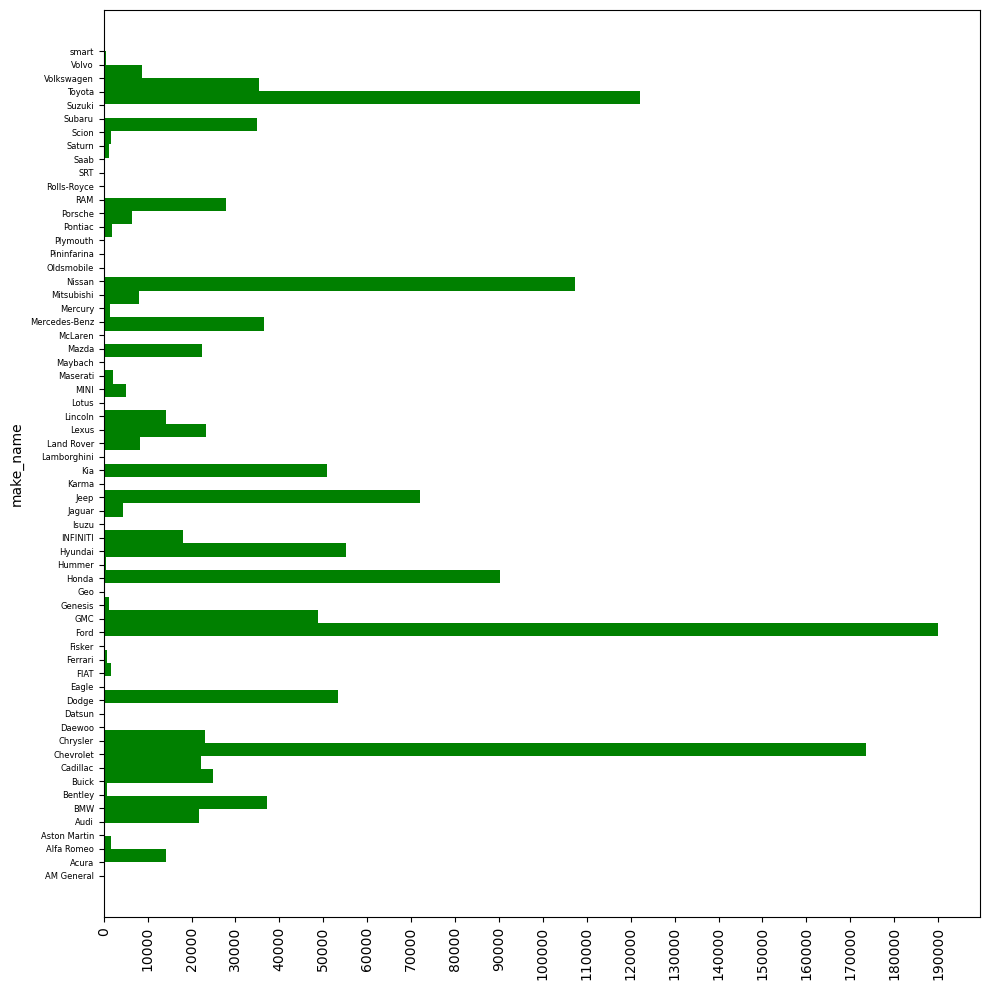

In [275]:
make_range = range(0, make_name_counts.max(), 10000) # Range of values for the x axis
#
histo_plot(sorted_car_data, 'make_name', 'green', len(uni_make), make_range, 'Histogram of Car Brands')

From the histogram above is is visible that the brands with the most cars in stock are Ford, Nissan and Chevrolet. These are populat brands so it makes sense they have the most cars in stock. Looking at most common body types:

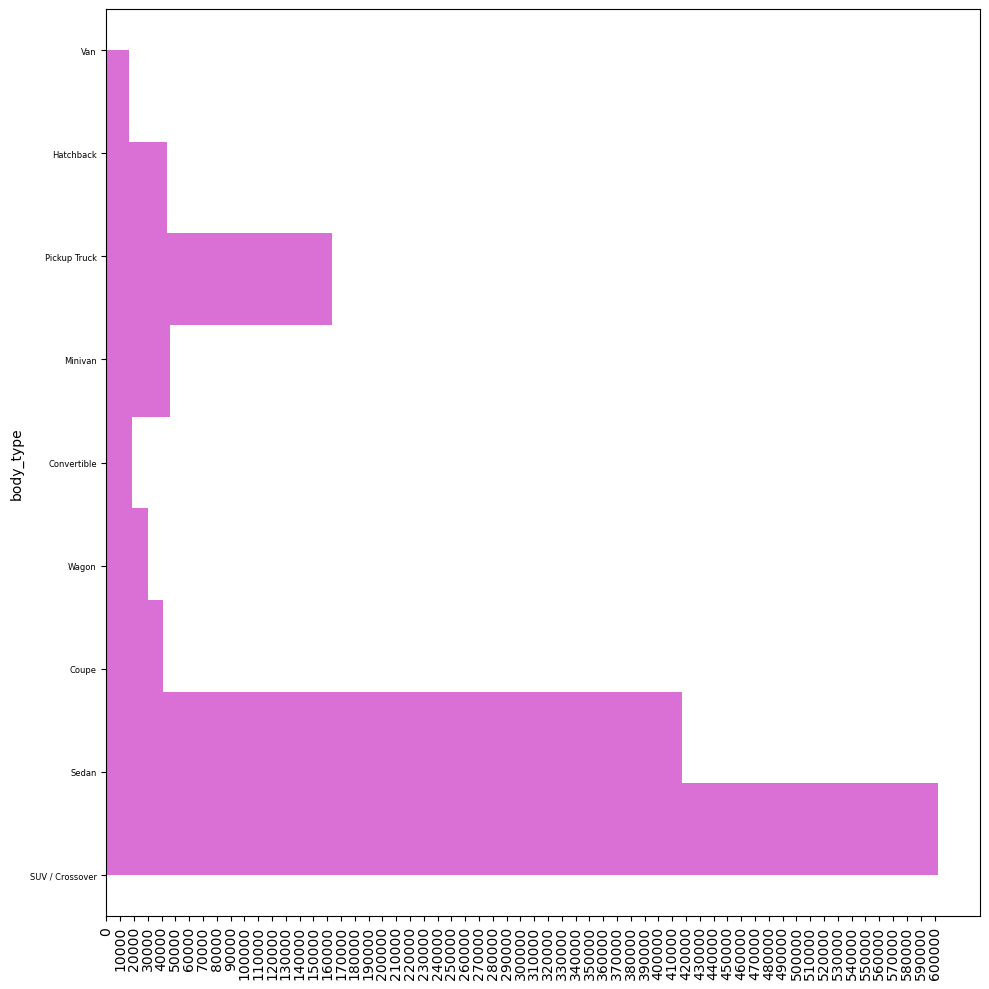

In [280]:
# Getting data as before:

unique_body = sorted_car_data['body_type'].unique()
body_counts = sorted_car_data['body_type'].value_counts(sort = True)
body_range = range(0, body_counts.max(), 10000) # Range of values for the x axis
#
histo_plot(sorted_car_data, 'body_type', 'orchid', len(unique_body), body_range, 'Histogram of Car Body Types')

Most cars in stock ar SUV/Crossover, but this are not necessarily the most expensive. Comparing prices based on body types:

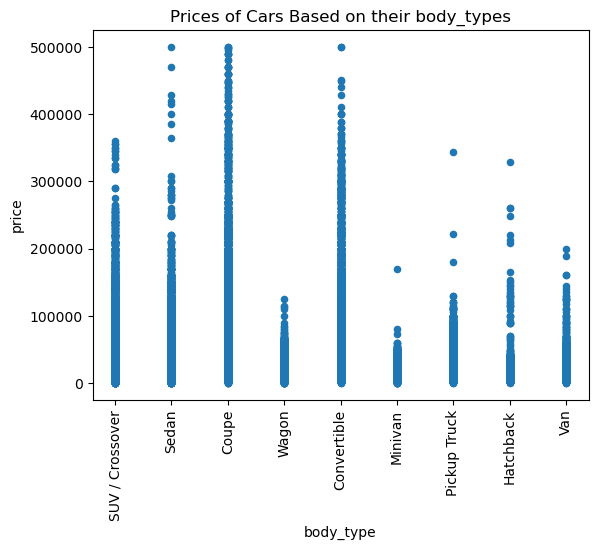

In [284]:
# Scatter plot of Price vs Body

scatter_plot(sorted_car_data, 'body_type', 'price', 'Prices of Cars Based on their body_types')
plt.xticks (rotation = 'vertical')
plt.show ()

So, even though the SUV is the most common car in stock, the most expensive ones tend to be Sedans, Coupes, and Convertibles.

The following parts of this project will be done in R.

In [1]:
# Saving the data to a new file:

sorted_car_data.to_csv('cleaned_car_data.csv')

NameError: name 'sorted_car_data' is not defined